RIDGE REGRESSION (L2 REGULARIZATION)
====================================
Ridge Regression adds L2 regularization to Linear Regression to prevent overfitting.
It adds a penalty term proportional to the square of the magnitude of coefficients.

Formula: Loss = RSS + α * Σ(βi²)
where α is the regularization strength (lambda)

L2 regularization shrinks coefficients towards zero but rarely makes them exactly zero.
This is useful when you want to keep all features but reduce their impact.
"""

In [1]:
# ============================================
# IMPORT LIBRARIES
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# ============================================
# LOAD AND EXPLORE DATASET
# ============================================
print("=" * 70)
print("RIDGE REGRESSION (L2) - California Housing Dataset")
print("=" * 70)

# Load the SAME dataset as Linear Regression for comparison
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')

print("\n1. DATASET OVERVIEW")
print("-" * 70)
print(f"Dataset shape: {X.shape}")
print(f"Using the same dataset as Linear Regression for fair comparison")

RIDGE REGRESSION (L2) - California Housing Dataset

1. DATASET OVERVIEW
----------------------------------------------------------------------
Dataset shape: (20640, 8)
Using the same dataset as Linear Regression for fair comparison


In [3]:
# ============================================
# DATA PREPROCESSING
# ============================================
print("\n2. DATA PREPROCESSING")
print("-" * 70)

# Use SAME split as Linear Regression (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Same seed for identical splits
)

# Feature Scaling - CRITICAL for Ridge Regression
# Ridge is sensitive to feature scales because it penalizes coefficient magnitudes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("✓ Features scaled (required for Ridge)")


2. DATA PREPROCESSING
----------------------------------------------------------------------
Training set size: 16512 samples
Testing set size: 4128 samples
✓ Features scaled (required for Ridge)


In [4]:
# ============================================
# FINDING OPTIMAL ALPHA (REGULARIZATION STRENGTH)
# ============================================
print("\n3. HYPERPARAMETER TUNING - Finding Optimal Alpha")
print("-" * 70)

# Alpha (α) controls the regularization strength
# α = 0: Equivalent to Linear Regression (no regularization)
# α → ∞: Coefficients approach zero (high regularization)

# Test a range of alpha values using Cross-Validation
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# RidgeCV automatically performs cross-validation to find best alpha
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

optimal_alpha = ridge_cv.alpha_
print(f"Tested alpha values: {alphas}")
print(f"✓ Optimal alpha found: {optimal_alpha}")

# Test each alpha and store results for visualization
train_scores = []
test_scores = []

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train)

    train_scores.append(ridge_temp.score(X_train_scaled, y_train))
    test_scores.append(ridge_temp.score(X_test_scaled, y_test))

print(f"\nAlpha vs R² Score:")
for i, alpha in enumerate(alphas):
    print(f"  α={alpha:7.3f} -> Train R²: {train_scores[i]:.4f}, Test R²: {test_scores[i]:.4f}")


3. HYPERPARAMETER TUNING - Finding Optimal Alpha
----------------------------------------------------------------------
Tested alpha values: [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
✓ Optimal alpha found: 0.001

Alpha vs R² Score:
  α=  0.001 -> Train R²: 0.6126, Test R²: 0.5758
  α=  0.010 -> Train R²: 0.6126, Test R²: 0.5758
  α=  0.100 -> Train R²: 0.6126, Test R²: 0.5758
  α=  1.000 -> Train R²: 0.6126, Test R²: 0.5758
  α= 10.000 -> Train R²: 0.6125, Test R²: 0.5761
  α=100.000 -> Train R²: 0.6120, Test R²: 0.5778
  α=1000.000 -> Train R²: 0.5905, Test R²: 0.5681
  α=10000.000 -> Train R²: 0.4582, Test R²: 0.4472


In [5]:
# ============================================
# MODEL TRAINING WITH OPTIMAL ALPHA
# ============================================
print("\n4. MODEL TRAINING")
print("-" * 70)

# Train Ridge Regression with optimal alpha
model = Ridge(alpha=optimal_alpha)
model.fit(X_train_scaled, y_train)

print(f"✓ Ridge model trained with α = {optimal_alpha}")
print(f"\nModel intercept (β0): {model.intercept_:.4f}")
print(f"\nModel coefficients (β1, β2, ..., βn):")

# Display coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.to_string(index=False))


4. MODEL TRAINING
----------------------------------------------------------------------
✓ Ridge model trained with α = 0.001

Model intercept (β0): 2.0719

Model coefficients (β1, β2, ..., βn):
   Feature  Coefficient
  Latitude    -0.896928
 Longitude    -0.869841
    MedInc     0.854383
 AveBedrms     0.339259
  AveRooms    -0.294410
  HouseAge     0.122546
  AveOccup    -0.040829
Population    -0.002308


In [6]:

# ============================================
# PREDICTIONS
# ============================================
print("\n5. MAKING PREDICTIONS")
print("-" * 70)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions completed")
print(f"\nSample predictions vs actual (first 5 test samples):")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5],
    'Difference': y_test.values[:5] - y_test_pred[:5]
})
print(comparison_df.to_string(index=False))


5. MAKING PREDICTIONS
----------------------------------------------------------------------
✓ Predictions completed

Sample predictions vs actual (first 5 test samples):
 Actual  Predicted  Difference
0.47700   0.719123   -0.242123
0.45800   1.764016   -1.306016
5.00001   2.709658    2.290352
2.18600   2.838926   -0.652926
2.78000   2.604657    0.175343


In [7]:
# ============================================
# MODEL EVALUATION
# ============================================
print("\n6. MODEL EVALUATION")
print("-" * 70)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET METRICS:")
print(f"  Mean Squared Error (MSE):  {train_mse:.4f}")
print(f"  Root Mean Squared Error:   {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"  R² Score:                  {train_r2:.4f}")

print("\nTESTING SET METRICS:")
print(f"  Mean Squared Error (MSE):  {test_mse:.4f}")
print(f"  Root Mean Squared Error:   {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  R² Score:                  {test_r2:.4f}")

print(f"\nOverfitting Check:")
print(f"  R² difference (Train - Test): {train_r2 - test_r2:.4f}")
if train_r2 - test_r2 > 0.1:
    print("  ⚠ Warning: Model may be overfitting!")
else:
    print("  ✓ Model is generalizing well (Ridge helps prevent overfitting)")


6. MODEL EVALUATION
----------------------------------------------------------------------
TRAINING SET METRICS:
  Mean Squared Error (MSE):  0.5179
  Root Mean Squared Error:   0.7197
  Mean Absolute Error (MAE): 0.5286
  R² Score:                  0.6126

TESTING SET METRICS:
  Mean Squared Error (MSE):  0.5559
  Root Mean Squared Error:   0.7456
  Mean Absolute Error (MAE): 0.5332
  R² Score:                  0.5758

Overfitting Check:
  R² difference (Train - Test): 0.0368
  ✓ Model is generalizing well (Ridge helps prevent overfitting)



7. VISUALIZATIONS
----------------------------------------------------------------------
✓ Visualizations saved as 'ridge_regression_analysis.png'


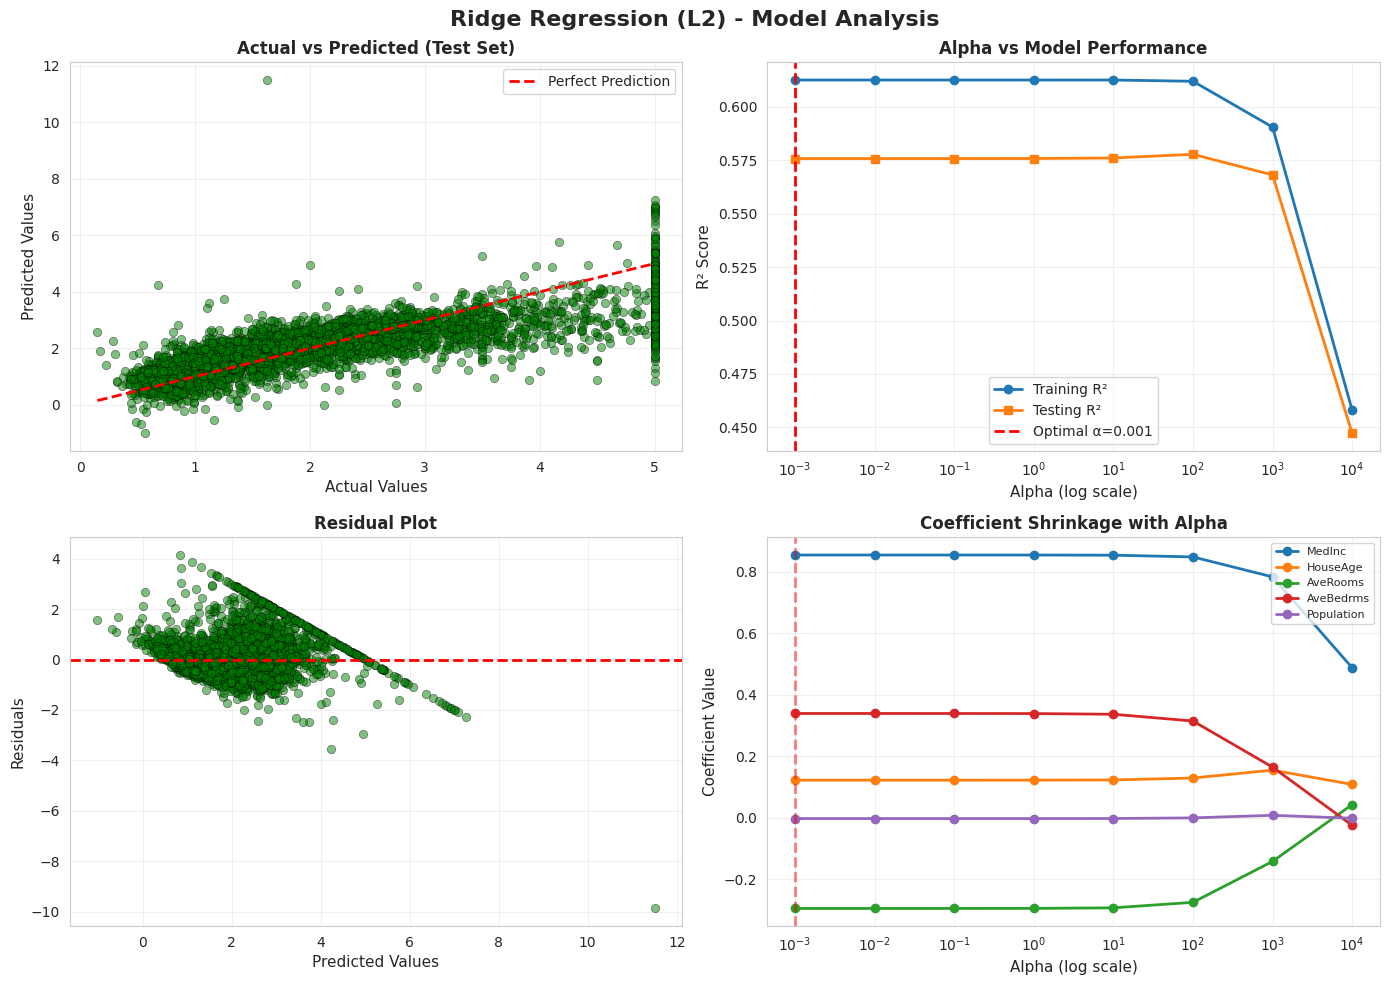

In [8]:
# ============================================
# VISUALIZATION
# ============================================
print("\n7. VISUALIZATIONS")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ridge Regression (L2) - Model Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidth=0.5, color='green')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=11)
axes[0, 0].set_ylabel('Predicted Values', fontsize=11)
axes[0, 0].set_title('Actual vs Predicted (Test Set)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Alpha vs R² Score (Cross-Validation Results)
axes[0, 1].semilogx(alphas, train_scores, 'o-', label='Training R²', linewidth=2)
axes[0, 1].semilogx(alphas, test_scores, 's-', label='Testing R²', linewidth=2)
axes[0, 1].axvline(x=optimal_alpha, color='red', linestyle='--',
                   linewidth=2, label=f'Optimal α={optimal_alpha}')
axes[0, 1].set_xlabel('Alpha (log scale)', fontsize=11)
axes[0, 1].set_ylabel('R² Score', fontsize=11)
axes[0, 1].set_title('Alpha vs Model Performance', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals Plot
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.5, edgecolors='k',
                   linewidth=0.5, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Coefficient Comparison at Different Alphas
# Show how coefficients shrink with increasing alpha
axes[1, 1].set_title('Coefficient Shrinkage with Alpha', fontsize=12, fontweight='bold')
for i in range(min(5, len(X.columns))):  # Plot first 5 features
    coef_values = []
    for alpha in alphas:
        ridge_temp = Ridge(alpha=alpha)
        ridge_temp.fit(X_train_scaled, y_train)
        coef_values.append(ridge_temp.coef_[i])
    axes[1, 1].semilogx(alphas, coef_values, 'o-', label=X.columns[i], linewidth=2)
axes[1, 1].axvline(x=optimal_alpha, color='red', linestyle='--',
                   linewidth=2, alpha=0.5)
axes[1, 1].set_xlabel('Alpha (log scale)', fontsize=11)
axes[1, 1].set_ylabel('Coefficient Value', fontsize=11)
axes[1, 1].legend(fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ridge_regression_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'ridge_regression_analysis.png'")


In [9]:
# ============================================
# SUMMARY AND INSIGHTS
# ============================================
print("\n8. SUMMARY")
print("=" * 70)
print("Ridge Regression (L2 Regularization) Summary:")
print(f"  • Optimal alpha (λ): {optimal_alpha}")
print(f"  • Test R² Score: {test_r2:.4f}")
print(f"  • Test RMSE: {test_rmse:.4f}")
print(f"  • Number of non-zero coefficients: {np.sum(model.coef_ != 0)} (all features kept)")
print(f"\nKey Characteristics:")
print(f"  ✓ Prevents overfitting through L2 regularization")
print(f"  ✓ Shrinks coefficients but keeps all features")
print(f"  ✓ Good when all features are potentially relevant")
print(f"  ✗ Doesn't perform feature selection")
print(f"  ✗ Less interpretable than Lasso (keeps all features)")
print("=" * 70)


8. SUMMARY
Ridge Regression (L2 Regularization) Summary:
  • Optimal alpha (λ): 0.001
  • Test R² Score: 0.5758
  • Test RMSE: 0.7456
  • Number of non-zero coefficients: 8 (all features kept)

Key Characteristics:
  ✓ Prevents overfitting through L2 regularization
  ✓ Shrinks coefficients but keeps all features
  ✓ Good when all features are potentially relevant
  ✗ Doesn't perform feature selection
  ✗ Less interpretable than Lasso (keeps all features)
